# Assignment 3 - Data Cleaning and Analysis

이번 과제에서 학생들은 주어진 데이터를 clean up 하고 분석하는 연습을 하게 될 것이다.

두개의 지정된 질문에 대한 답을 하여야 하고 세개의 질문을 스스로 만들어 코드와 함께 결과를 제시한다.


### Dataset

타이타닉호의 모든 승객, 승무원의 정보와 생존자, 사망자 정보는 다음의 웹사이트에 잘 정리되어있다.
* https://hbiostat.org/data/repo/titanic.html

본 과제에서 제시하는 데이터는 해당 웹사이트의 정보를 담고 있다. 다음의 데이터를 다운로드하여 분석하고 아래의 질문에 답하시오.
* 데이터: https://hbiostat.org/data/repo/titanic3.xls
* 데이터 변수 설명: https://hbiostat.org/data/repo/Ctitanic3.html


### Q1: 타이타닉의 사망자, 생존자 숫자를 성별로 나누어 Bar Chart로 그려보자. (3Points)

In [2]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sb

In [3]:

def load_data(filename):
    data = pd.read_excel(filename)
    return data


In [4]:
df = load_data("titanic3.xls")

In [4]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
female_survived_number = 0
female_perished_number = 0
female_survived = (df['sex'] == 'female') & (df['survived'] == True)
female_survived_number = female_survived.value_counts()[1] 
female_perished = (df['sex'] == 'female') & (df['survived'] == False)
female_perished_number = female_perished.value_counts()[1] 





In [6]:
male_survived_number = 0
male_perished_number = 0
male_survived = (df['sex'] == 'male') & (df['survived'] == True)
male_survived_number = male_survived.value_counts()[1] 
male_perished = (df['sex'] == 'male') & (df['survived'] == False)
male_perished_number = male_perished.value_counts()[1] 
male_perished_number

682

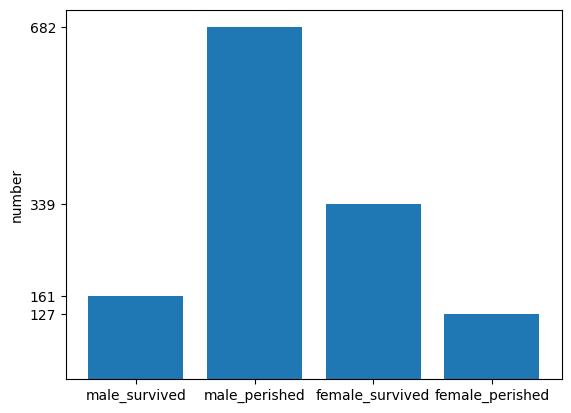

In [7]:
Y = [male_survived_number, male_perished_number, female_survived_number, female_perished_number]
X = np.arange(4)

xlabel = ['male_survived', 'male_perished', 'female_survived', 'female_perished']
pl.bar(X,Y)
pl.xticks(X, xlabel)
pl.yticks(sorted(Y))
pl.ylabel('number')

pl.show()

### Q2: 생존자의 평균 티켓 가격과 사망자의 평균 티켓 가격을 구하고 비교하는 그래프를 그려보자. (3Points)

In [8]:
people_survived = df[df['survived'] == True]

people_survived
people_survived.fare.mean()



49.361183600000004

In [9]:
people_perished = df[df['survived'] == False]

people_perished
people_perished.fare.mean()

23.353830569306933

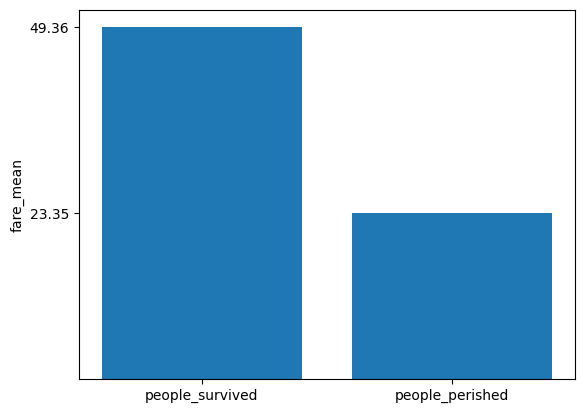

In [10]:
Y = [people_survived.fare.mean(), people_perished.fare.mean()]
X = np.arange(2)

xlabel = ['people_survived', 'people_perished']
pl.bar(X,Y)
pl.xticks(X, xlabel)
pl.yticks(sorted(Y))
pl.ylabel('fare_mean')

pl.show()

In [29]:
df_fare = pd.DataFrame(data=np.array([people_survived.fare.mean(), people_perished.fare.mean()]), index = ['survived', 'perished'],
columns = ['fare_mean'])

df_fare

,fare_mean
survived,49.361184
perished,23.353831


### Q3: 성별에 따른 생존자, 사망자 수를 카운트하여 2x2 데이터 프레임을 만들어 보자. (3Points)

|          | male | female |
|----------|------|--------|
| Survived |      |        |
| Perished |      |        |


In [11]:
dframe = pd.DataFrame(data=np.array([[male_survived_number, female_survived_number], [male_perished_number,female_perished_number]]), index = ['survived', 'perished'], columns = ['male', 'female'])

display(dframe)

,male,female
survived,161,339
perished,682,127


### Q4: Pclass별로 나누어 사망자, 생존자 수 카운트하고 그래프를 그려보자. (3Points)

In [12]:
print(df["pclass"].unique())
print(type(df["pclass"]))

[1 2 3]
<class 'pandas.core.series.Series'>


In [13]:

pclass_1_survived = (df['pclass'] == 1) & (df['survived'] == True)
pclass_1_perished = (df['pclass'] == 1) & (df['survived'] == False)
pclass_2_survived = (df['pclass'] == 2) & (df['survived'] == True)
pclass_2_perished = (df['pclass'] == 2) & (df['survived'] == False)
pclass_3_survived = (df['pclass'] == 3) & (df['survived'] == True)
pclass_3_perished = (df['pclass'] == 3) & (df['survived'] == False)



In [14]:
pclass_1_sur_num = pclass_1_survived.value_counts()[1]
pclass_1_per_num = pclass_1_perished.value_counts()[1]
pclass_1_total = pclass_1_sur_num + pclass_1_per_num
pclass_2_sur_num = pclass_2_survived.value_counts()[1]
pclass_2_per_num = pclass_2_perished.value_counts()[1]
pclass_2_total = pclass_2_sur_num + pclass_2_per_num
pclass_3_sur_num = pclass_3_survived.value_counts()[1]
pclass_3_per_num = pclass_3_perished.value_counts()[1]
pclass_3_total = pclass_3_sur_num + pclass_3_per_num




pclass_3_per_num



528

In [15]:
dframe = pd.DataFrame(data=np.array([[pclass_1_sur_num, pclass_1_per_num, pclass_1_total], [pclass_2_sur_num, pclass_2_per_num, pclass_2_total], [pclass_3_sur_num, pclass_3_per_num, pclass_3_total]]), index = ['pclass1', 'pclass2', 'pclass3'], columns = ['survived', 'perished', 'total'])

display(dframe)

,survived,perished,total
pclass1,200,123,323
pclass2,119,158,277
pclass3,181,528,709


Text(0.5, 1.0, 'Pclass and Life rate')

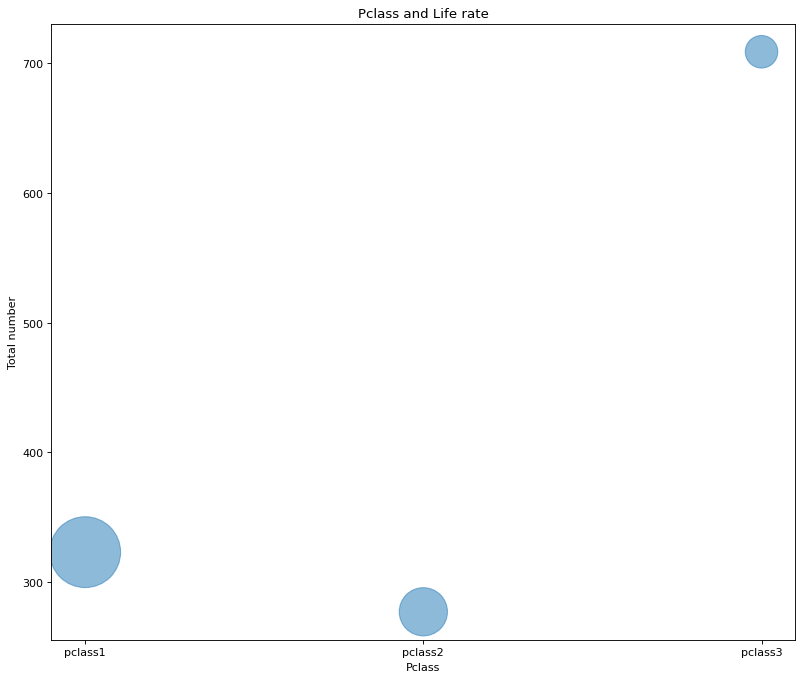

In [16]:
from matplotlib.pyplot import figure #figure은 그래프에 대한 전반적인 세팅

x = dframe.index
y = dframe.total
z = dframe.survived / dframe.perished

figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

# Change color with c and alpha. I map the color to the X axis value.
pl.scatter(x, y, s=z*2500, alpha=0.5) #size는 z(gdp). gdp의 차이가 굉장히 많이 나서 /10. alpha는 투명도
 
# # Add titles (main and on axis)

pl.xlabel("Pclass")
pl.ylabel("Total number")
pl.title("Pclass and Life rate")

### Q5: 데이터를 탐색하여 질문을 스스로 만들고 답을 제시하시오. (5Points)

In [20]:
# sibsp, 함께 온 동반자의 수에 따라 생존률이 달라질까?
df
sibsp_0_sur = (df['sibsp'] == 0) & (df['survived'] == True)
sibsp_0_per = (df['sibsp'] == 0) & (df['survived'] == False)
sibsp_1_sur = (df['sibsp'] == 1) & (df['survived'] == True)
sibsp_1_per = (df['sibsp'] == 1) & (df['survived'] == False)
sibsp_more2_sur = (df['sibsp'] >= 2) & (df['survived'] == True)
sibsp_more2_per = (df['sibsp'] >= 2) & (df['survived'] == False)

sibsp_0_sur_num = sibsp_0_sur.value_counts()[1]
sibsp_0_per_num = sibsp_0_per.value_counts()[1]
sibsp_1_sur_num = sibsp_1_sur.value_counts()[1]
sibsp_1_per_num = sibsp_1_per.value_counts()[1]
sibsp_more2_sur_num = sibsp_more2_sur.value_counts()[1]
sibsp_more2_per_num = sibsp_more2_per.value_counts()[1]


In [23]:
daframe = pd.DataFrame(data=np.array([sibsp_0_sur_num / (sibsp_0_sur_num + sibsp_0_per_num), sibsp_1_sur_num / (sibsp_1_sur_num + sibsp_1_per_num), 
sibsp_more2_sur_num / (sibsp_more2_sur_num + sibsp_more2_per_num)]), 
index = ['sibsp=0', 'sibsp=1', 'sibsp>=2'], columns = ['survived rate'])

display(daframe)

,survived rate
sibsp=0,0.346801
sibsp=1,0.510972
sibsp>=2,0.282828


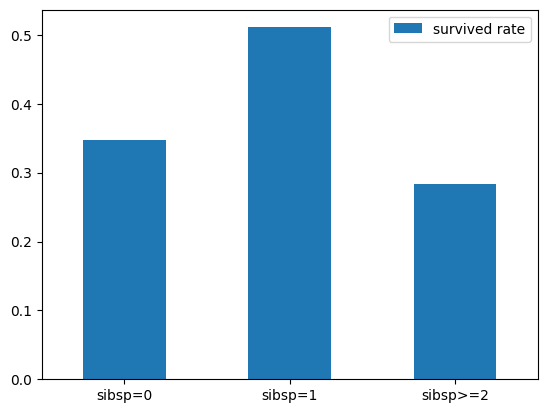

In [26]:
ax = daframe.plot.bar(rot=0)

### Extra: 본 내용을 Streamlit을 이용하여 보고서를 만드시오. (Extra 3Points)
